In [30]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
# The easiest way to make Plotly plots:
import plotly.express as px
# Lower-level interface (if you want to test it):
import plotly.graph_objects as go
# For configuration (keep reading ;):
import plotly.io as pio
import numpy as np
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
# Let plotly know it runs inside a Jupyter Notebook
pio.renderers.default = 'notebook'

In [8]:
columns = ["Year", "Day", "Hour", "DSCOVR Bx_gse, nT", "DSCOVR By_gse, nT" , "DSCOVR Bz_gse, nT"]

file_path = "data/DSCOVR/readings_DSCOVR.lst"
df = pd.read_csv(file_path, sep = "\s+", header=None, names= columns)
df.head()

,Year,Day,Hour,"DSCOVR Bx_gse, nT","DSCOVR By_gse, nT","DSCOVR Bz_gse, nT"
0,2016,156,0,999.9,999.9,999.9
1,2016,156,1,1.7,-2.2,1.1
2,2016,156,2,-0.2,-3.2,0.4
3,2016,156,3,-0.1,-3.1,0.3
4,2016,156,4,2.5,-1.6,-1.0


In [9]:
# merge Year Day hour into one column
df["Date-Time"] = pd.to_datetime(df[["Year", "Day", "Hour"]].astype(str).agg('-'.join, axis=1), format="%Y-%j-%H")
df.set_index('Date-Time', inplace=True)
df.head()

,Year,Day,Hour,"DSCOVR Bx_gse, nT","DSCOVR By_gse, nT","DSCOVR Bz_gse, nT"
Date-Time,,,,,,
2016-06-04 00:00:00,2016,156,0,999.9,999.9,999.9
2016-06-04 01:00:00,2016,156,1,1.7,-2.2,1.1
2016-06-04 02:00:00,2016,156,2,-0.2,-3.2,0.4
2016-06-04 03:00:00,2016,156,3,-0.1,-3.1,0.3
2016-06-04 04:00:00,2016,156,4,2.5,-1.6,-1.0


In [10]:
# Remove all 999.99, replace with NaN
df.loc[df["DSCOVR Bx_gse, nT"] == 999.9, "DSCOVR Bx_gse, nT"] = None
df.loc[df["DSCOVR By_gse, nT"] == 999.9, "DSCOVR By_gse, nT"] = None
df.loc[df["DSCOVR Bz_gse, nT"] == 999.9, "DSCOVR Bz_gse, nT"] = None

df.head()

,Year,Day,Hour,"DSCOVR Bx_gse, nT","DSCOVR By_gse, nT","DSCOVR Bz_gse, nT"
Date-Time,,,,,,
2016-06-04 00:00:00,2016,156,0,NaN,NaN,NaN
2016-06-04 01:00:00,2016,156,1,1.7,-2.2,1.1
2016-06-04 02:00:00,2016,156,2,-0.2,-3.2,0.4
2016-06-04 03:00:00,2016,156,3,-0.1,-3.1,0.3
2016-06-04 04:00:00,2016,156,4,2.5,-1.6,-1.0


In [11]:
imp_cols=["DSCOVR Bx_gse, nT", "DSCOVR By_gse, nT", "DSCOVR Bz_gse, nT"]
for col in imp_cols:
    nan_count = df[col].isna().sum()
    print(f"{col} has Nan: {nan_count} / {len(df[col])}")


DSCOVR Bx_gse, nT has Nan: 2053 / 26592
DSCOVR By_gse, nT has Nan: 2053 / 26592
DSCOVR Bz_gse, nT has Nan: 2053 / 26592


In [12]:
# Dealing w Nan ideas
#1) replace w zero
df['DSCOVR Bz_gse, nT'].fillna(0, inplace=True)

In [32]:
fft_vals = np.fft.fft(df["DSCOVR Bz_gse, nT"])

fft_freq = np.fft.fftfreq(len(fft_vals))# Corresponding frequencies

fig = px.line(fft_freq, fft_vals)
# Create figure
fig_DSCOVR_raw = go.Figure()

fig_DSCOVR_raw.add_trace(
    go.scatter(x=list(df["DSCOVR Bz_gse, nT"]), y=list(df["DSCOVR Bz_gse, nT"])))

# Set title
fig.update_layout(
    title_text="Time series with range slider and selectors"
)

fig = px.line()
plt.figure(figsize=(15, 7))

plt.subplot(2, 1, 1)
plt.plot(df["DSCOVR Bz_gse, nT"])
plt.title('Original Time Series Data (DSCOVR)')
plt.xlabel('Time Index')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(np.abs(fft_freq), np.abs(fft_vals))
plt.title('Magnitude of FFT - Frequency Domain (DSCOVR)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


TypeError: 'module' object is not callable

In [36]:
fft_vals = np.fft.fft(df["DSCOVR Bz_gse, nT"])

fft_freq = np.fft.fftfreq(len(fft_vals))# Corresponding frequencies

fig = px.line(fft_freq, fft_vals)
fig.show()


TypeError: Object of type complex is not JSON serializable

In [27]:
fig = px.line(df["DSCOVR Bz_gse, nT"])

/Users/eunice/opt/anaconda3/envs/Py3104/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# THresholding

In [15]:
df2 = df.copy()

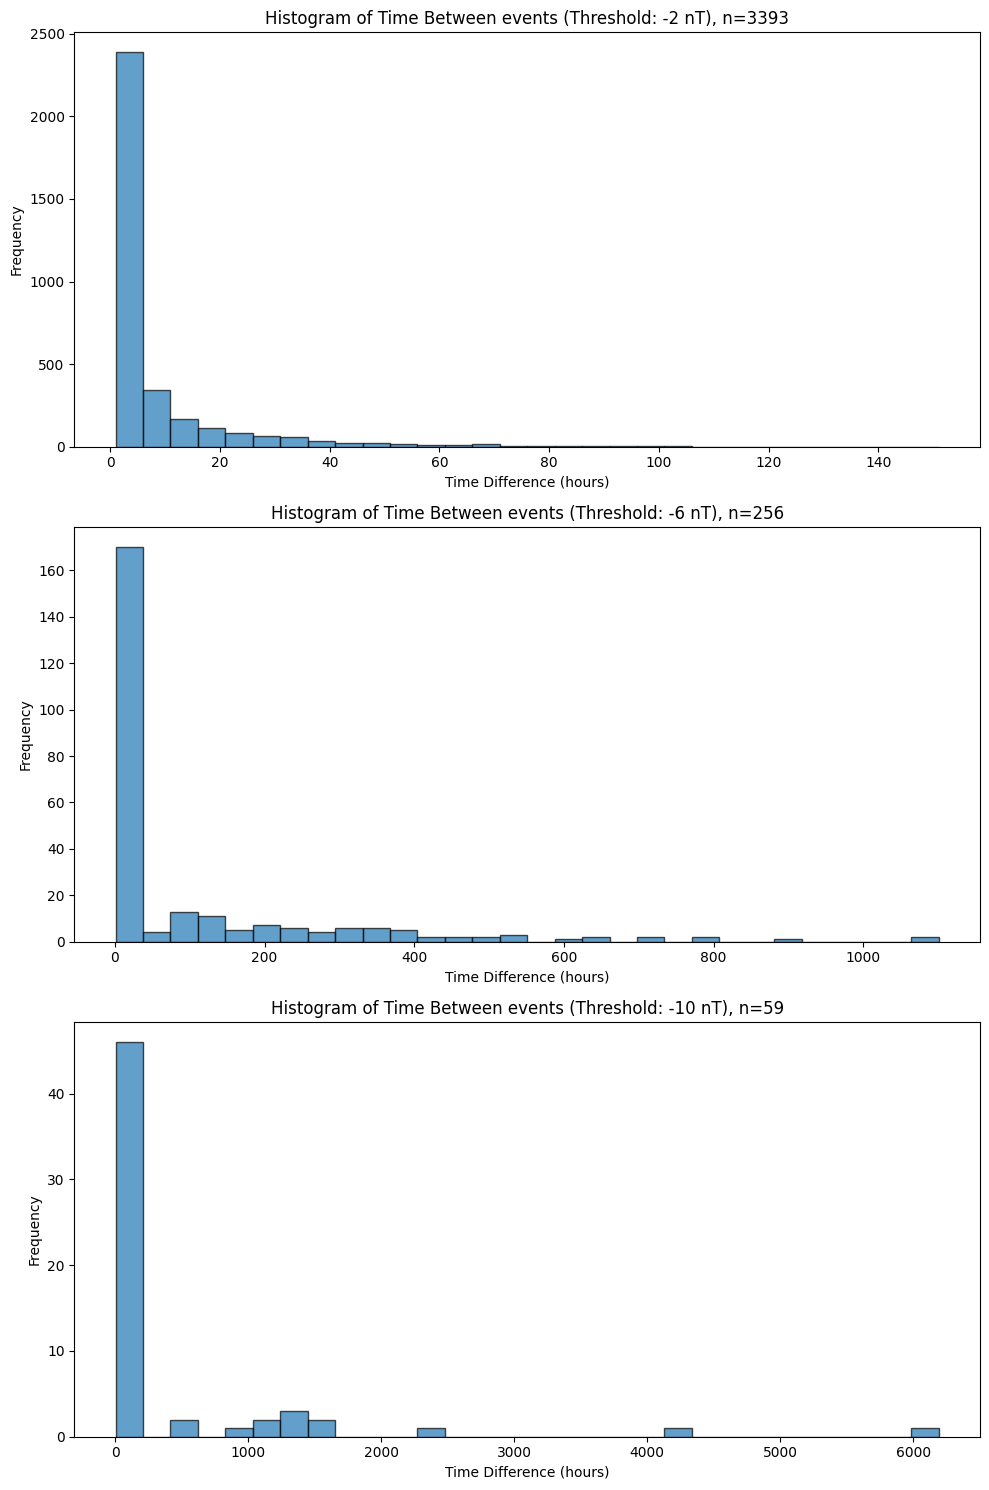

In [16]:
thresholds = [-2, -6, -10] #in nT

fig, axs = plt.subplots(len(thresholds), figsize=(10, 5*len(thresholds)))
for i, threshold in enumerate(thresholds):
    DSCOVR_IMF_times = df2.index[ df2["DSCOVR Bz_gse, nT"] <= threshold]
    DSCOVR_IMF_time_diffs = DSCOVR_IMF_times[1:] - DSCOVR_IMF_times[:-1]
    # print("Number of IMF below {threshold} nT threshold: ", len(DSCOV_IMF_time_diffs))

    DSCOVR_IMF_time_diffs_hrs = DSCOVR_IMF_time_diffs.total_seconds() / 3600  
    axs[i].hist(DSCOVR_IMF_time_diffs_hrs, bins=30, edgecolor='k', alpha=0.7)
    axs[i].set_title(f'Histogram of Time Between events - DSCOVR (Threshold: {threshold} nT), n={len(DSCOVR_IMF_time_diffs)}')
    axs[i].set_xlabel('Time Difference (hours)')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [17]:
# Creating the new dataset for event/noevent
for threshold in thresholds:
    df[f'z_binary_{threshold}'] = (df["DSCOVR Bz_gse, nT"] <= threshold).astype(int)

In [18]:
df.head()

,Year,Day,Hour,"DSCOVR Bx_gse, nT","DSCOVR By_gse, nT","DSCOVR Bz_gse, nT",z_binary_-2,z_binary_-6,z_binary_-10
Date-Time,,,,,,,,,
2016-06-04 00:00:00,2016,156,0,NaN,NaN,0.0,0,0,0
2016-06-04 01:00:00,2016,156,1,1.7,-2.2,1.1,0,0,0
2016-06-04 02:00:00,2016,156,2,-0.2,-3.2,0.4,0,0,0
2016-06-04 03:00:00,2016,156,3,-0.1,-3.1,0.3,0,0,0
2016-06-04 04:00:00,2016,156,4,2.5,-1.6,-1.0,0,0,0


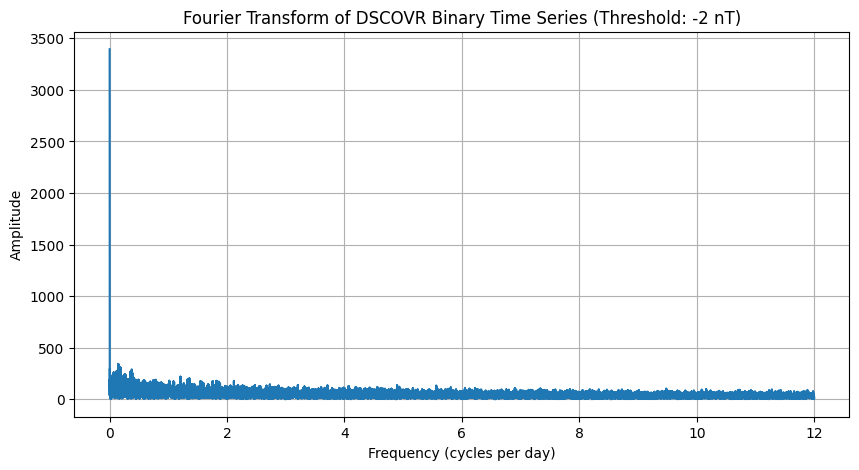

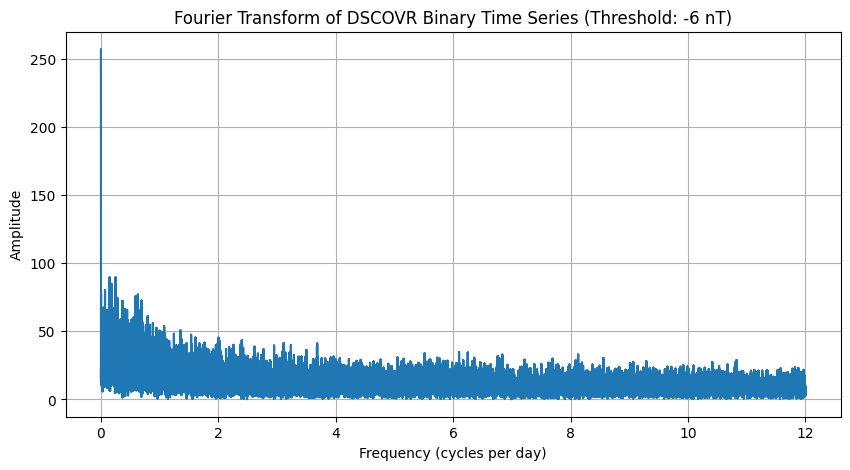

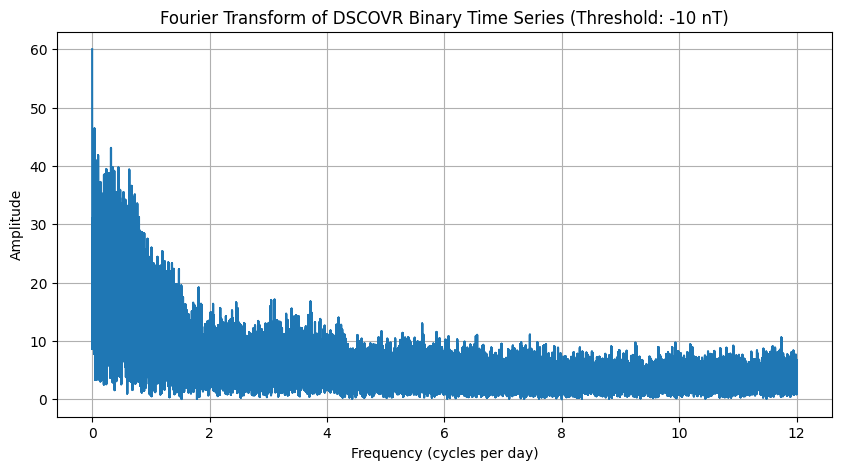

In [23]:
for chosen_threshold in thresholds:
    binary_series = df[f'z_binary_{chosen_threshold}']

    TIME_SPACING = 1/24
    fft_vals = np.fft.fft(binary_series)
    fft_freq = np.fft.fftfreq(len(fft_vals), d=TIME_SPACING)

    plt.figure(figsize=(10, 5))
    plt.plot(np.abs(fft_freq), np.abs(fft_vals))
    plt.title(f'Fourier Transform of DSCOVR Binary Time Series (Threshold: {chosen_threshold} nT)')
    plt.xlabel('Frequency (cycles per day)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

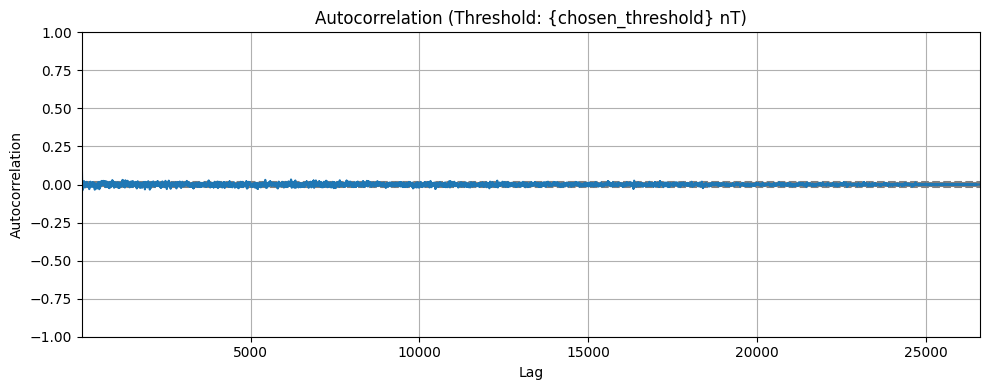

In [20]:
binary_series = df['DSCOVR Bz_gse, nT']
plt.figure(figsize=(10, 4))
autocorrelation_plot(binary_series)
plt.title('Autocorrelation (Threshold: {chosen_threshold} nT)')
plt.tight_layout()
plt.show()

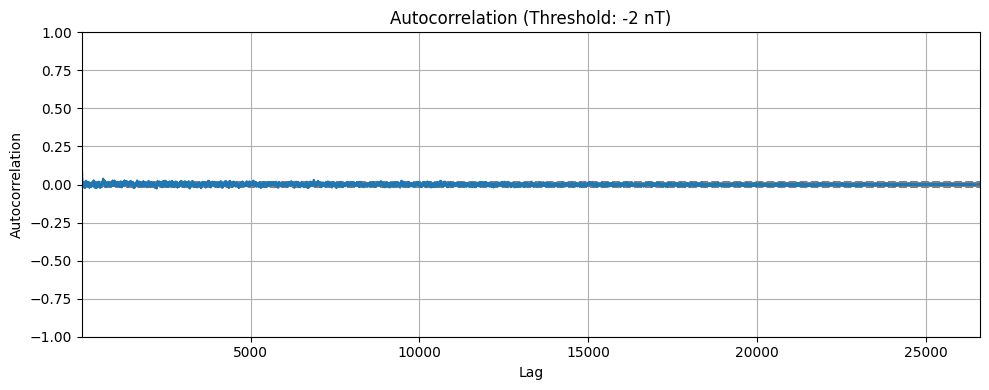

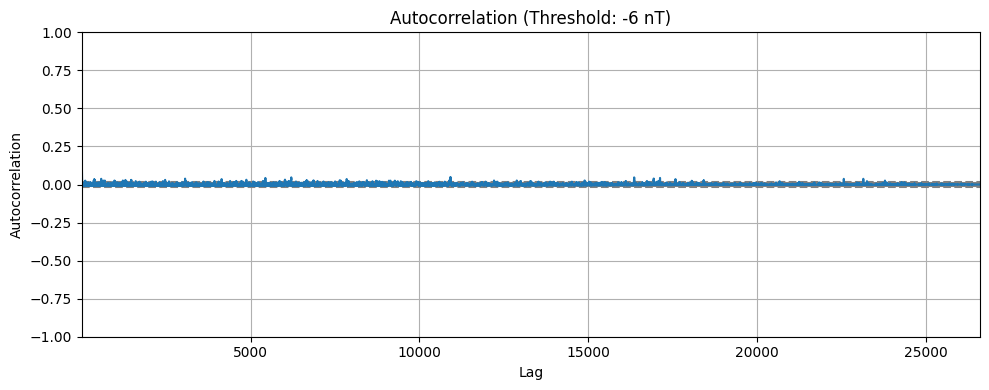

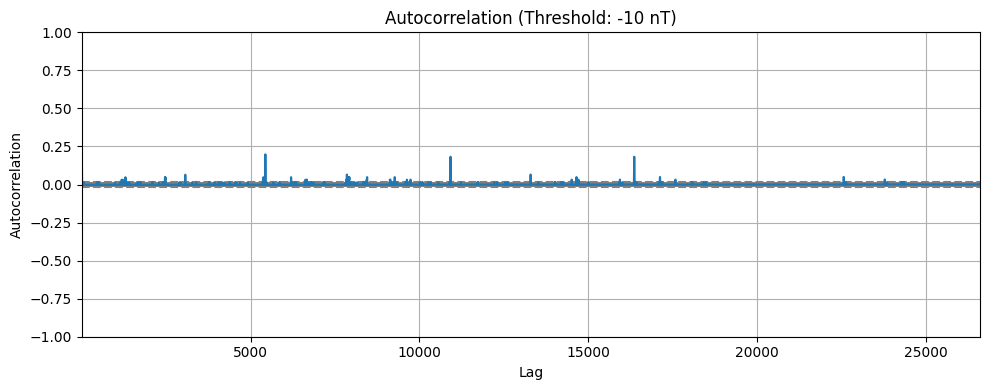

In [21]:
for chosen_threshold in thresholds:
    binary_series = df[f'z_binary_{chosen_threshold}']
    plt.figure(figsize=(10, 4))
    autocorrelation_plot(binary_series)
    plt.title(f'Autocorrelation (Threshold: {chosen_threshold} nT)')
    plt.tight_layout()
    plt.show()
